## Analysing human behaviour: RT & masking effect

This notebook reproduces the correlation analysis between average RT and masking effect from _Visual manipulations trigger recurrent processing_.

### Correlating RT and masking effect

To go further in accounting for the need of recurrent processing in our manipulations, we correlate average reaction time and masking effect per task.

We divide the dataset into 17 tasks (control condition plus each level of each manipulation). For each task we calculate an **average RT** across masking levels and a **masking effect** as the difference in average accuracy _with_ and _without_ masking.

In [10]:
## preamble

# packages
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import json

# define some labels for the plots
tasks_names = {'scrambling_lowpass': 'Low pass', 'occlusion_many_small_partial_viewing_high': 'MS occluder high'}

In [2]:
# read the data
df = pd.read_csv('../data/human_data.csv')

In [3]:
# start by defining the 17 tasks
tasks = ['control', 'clutter_light', 'clutter_heavy', 'scrambling_highpass', 'scrambling_lowpass', 'occlusion_few_large_deletion_low', 'occlusion_few_large_deletion_high', 'occlusion_few_large_partial_viewing_low', 'occlusion_few_large_partial_viewing_high', 'occlusion_few_large_blobs_high', 'occlusion_few_large_blobs_low', 'occlusion_many_small_deletion_low', 'occlusion_many_small_deletion_high', 'occlusion_many_small_blobs_low', 'occlusion_many_small_blobs_high', 'occlusion_many_small_partial_viewing_low', 'occlusion_many_small_partial_viewing_high']

In [7]:
# build a df with average RT and masking effect per task
mask_rt_df = pd.DataFrame({
    'task' : [t for t in tasks],
    'masking effect': [np.mean(df.loc[(df['task']==t) & (df['mask']=='no mask'), 'acc'])
                                - np.mean(df.loc[(df['task']==t) & (df['mask']=='mask'), 'acc'])
                       for t in tasks],
    'RT' : [np.mean(df.loc[(df['task']==t), 'rt']) for t in tasks]
})

In [8]:
# correlate the results
corr, p_value = pearsonr(mask_rt_df['RT'].values, mask_rt_df['masking effect'].values)
# print the results
print(f'Average RT and masking effect have a pearson\'s R correlation of {corr}.')

# confirm the results without outliers
no_outliers = mask_rt_df.drop(
    mask_rt_df.loc[mask_rt_df['task'].isin(
        ['scrambling_lowpass', # we remove the two extreme conditions
         'occlusion_many_small_partial_viewing_high'])
                   ].index)
corr, p_value = pearsonr(no_outliers['RT'].values, no_outliers['masking effect'].values)

# print the results
print(f'\nWithout outliers, this value remains of {corr}.')

Average RT and masking effect have a pearson's R correlation of 0.9235185812033688.

Without outliers, this value remains of 0.8568756743704522.


### Plot

This section reproduces the plots linked to the correlation between average RT and masking effect.

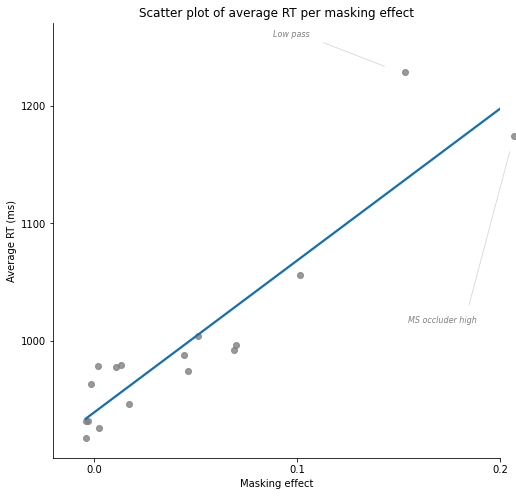

In [27]:
# make a scatter plot of RT x masking effect
f, ax = plt.subplots(figsize = (8.0, 8.0))

plt.locator_params(axis = 'y', nbins=4)
plt.locator_params(axis = 'x', nbins=3)

scatplot = sns.regplot(
    data = mask_rt_df,
    x = 'masking effect',
    y = 'RT',
    ci = None,
    scatter_kws={"color": "gray"}, line_kws={"color": '#1670B0'},
    ax = ax
)
plt.setp(scatplot.collections, clip_on=False)
scatplot.set(xlabel = 'Masking effect', ylabel = 'Average RT (ms)')
ax.set_xlim(-0.02, 0.2)  # Adjust the limits as needed

# annotating the outliers: 
# x0, y0 are the coordinates of the start of the bar
# x1, y1 are the increments from x0, y0 to the end of the bar
# x2, y2 are the increments from x1, y1 to place the text labels
outliers = {
    'occlusion_many_small_partial_viewing_high' : {'x0': -0.002, 'y0': -13.0, 'x1':-0.02,'y1': -130.0, 'x2':-0.03,'y2': -15.0},
    'scrambling_lowpass' :  {'x0': -0.01, 'y0': 5.0, 'x1':- 0.03,'y1': 20.0, 'x2':- 0.025,'y2': 5.0},
}
for k, v in outliers.items():
    # find the coordinates
    x0 = mask_rt_df.loc[mask_rt_df['task']==k, 'masking effect'].values[0] + v['x0']
    y0 = mask_rt_df.loc[mask_rt_df['task']==k, 'RT'].values[0] + v['y0']
    # draw a line
    x1, y1 = x0 + v['x1'], y0 + v['y1']
    ax.plot([x0, x1], [y0, y1], linewidth = 0.75, color='lightGray', ls='-', zorder=0, clip_on = False)
    # write the name of the tasks
    ax.annotate(
        tasks_names[k], (x1 + v['x2'], y1 + v['y2']),
        annotation_clip=False, ha='left',
        style = 'italic', fontsize = 8.0, color = 'gray',
    )
# remove the top and right sides of the frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# give a title to the plot
plt.title('Scatter plot of average RT per masking effect')